In [382]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm

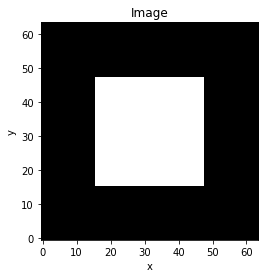

In [383]:
img = np.zeros((64,64))
img[16:48, 16:48] = np.ones((32,32))

plt.title('Image')
plt.ylabel('y')
plt.xlabel('x')
plt.imshow(img, origin='lower', cmap='gray');

In [384]:
# returns x derivative, y derivative and magnitude of image
def img_derivative(image):
    #Hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype='float32')
    #Hy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype='float32')

    #Ix = sp.signal.convolve2d(image, Hx, 'same')
    #Iy = sp.signal.convolve2d(image, Hy, 'same')
    
    Ix = cv.Sobel(image,cv.CV_64F,1,0,ksize=3)
    Iy = cv.Sobel(image,cv.CV_64F,0,1,ksize=3)

    Igrad = np.sqrt(np.square(Ix) + np.square(Iy))
    
    return Ix, Iy, Igrad

Ix, Iy, Igrad = img_derivative(img)

orientation = np.degrees(np.arctan2(Iy, Ix))

'''
plt.figure(figsize=(10,10))
plt.imshow(square_grad_mag, cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])
plt.title('Gradient magnitude')
'''


"\nplt.figure(figsize=(10,10))\nplt.imshow(square_grad_mag, cmap='gray', interpolation='none')\nplt.xticks([])\nplt.yticks([])\nplt.title('Gradient magnitude')\n"

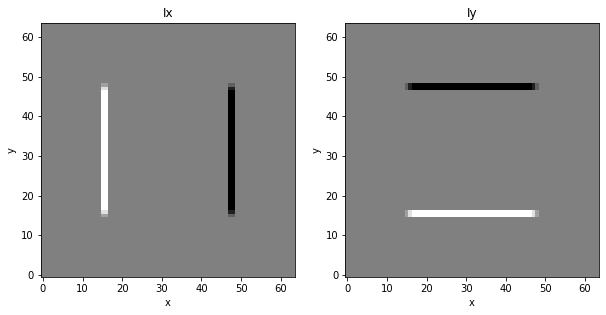

In [385]:
#Test code
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Ix')
plt.xlabel('x'), plt.ylabel('y')
plt.imshow(Ix, origin='lower', cmap='gray')
plt.subplot(122)
plt.title('Iy')
plt.xlabel('x'), plt.ylabel('y')
plt.imshow(Iy,origin='lower',cmap='gray');

In [386]:
# Visualize Gradiant Magnitude
hsv = np.zeros([square_grad_mag.shape[0],square_grad_mag.shape[0],3], dtype=np.uint8)
hsv[..., 1] = 255

mag, ang = cv.cartToPolar(Ix[...], Iy[...])
hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
Igrad_color = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

'''
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(Igrad_color)
plt.xticks([])
plt.yticks([])
'''

'\nplt.figure(figsize=(20,10))\nplt.subplot(121)\nplt.imshow(Igrad_color)\nplt.xticks([])\nplt.yticks([])\n'

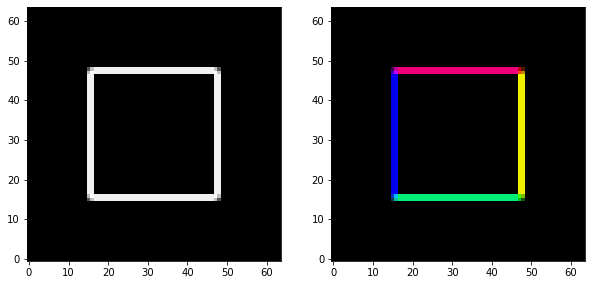

In [387]:
#Test code
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(Igrad, origin='lower', cmap='gray')
plt.subplot(122)
plt.imshow(Igrad_color, origin='lower', cmap=cm.get_cmap('prism'));

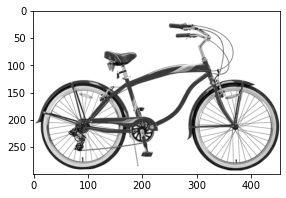

In [388]:
img = cv.imread('data/bicycle.bmp', 0)
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(img, cmap='gray')

In [389]:
# returns histogram made from passed image
def compute_histograms(image):
    
    #Compute Magnitude histogram
    Ix, Iy, I_magnitude = img_derivative(image)
    I_magnitude = I_magnitude**2
    I_magnitude = np.ma.masked_equal(I_magnitude,0)
    
    minimum = np.min(I_magnitude)
    maximum = np.max(I_magnitude)
    #print(minimum , " " , maximum)
    n_bins = 32
    bins = np.linspace(minimum, maximum, n_bins)
    h_grad1, edges = np.histogram(I_magnitude, bins)
    
    c_grad1 = (edges[:-1]+edges[1:])/2
    
    #Compute Angle histogram
    angle = np.degrees(np.arctan2(Iy, Ix))
    angle = angle[I_magnitude != np.ma.masked]
    
    n_bins = 360
    bins = np.linspace(-180, 180, n_bins)
    h_angle1, edges = np.histogram(angle, bins)
    c_angle1 = (edges[:-1]+edges[1:])/2
        
    
    return h_grad1, c_grad1, h_angle1, c_angle1

print()


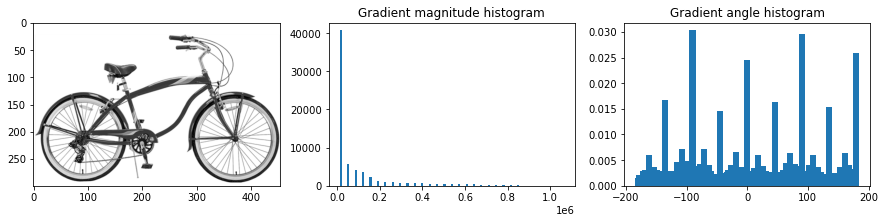

In [390]:
#Test code
h_grad1, c_grad1, h_angle1, c_angle1 = compute_histograms(img)
h_angle1 = h_angle1 / np.sum(h_angle1)
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.title('Gradient magnitude histogram')
plt.bar(c_grad1, h_grad1, width=10000)

plt.subplot(133)
plt.title('Gradient angle histogram')
plt.bar(c_angle1, h_angle1, width=10);



<h1>Make Histograms for both pics below and comapre results</h1>

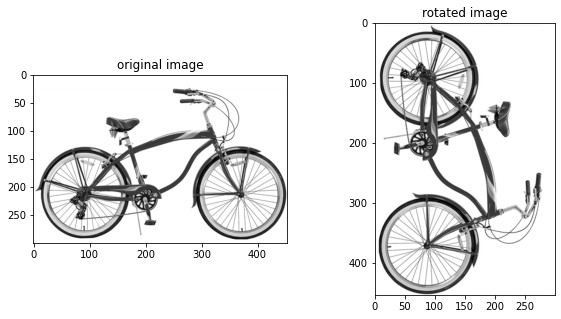

In [391]:
img = cv.imread('data/bicycle.bmp', 0)
img_rot = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('original image')
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.title('rotated image')
plt.imshow(img_rot, cmap='gray');


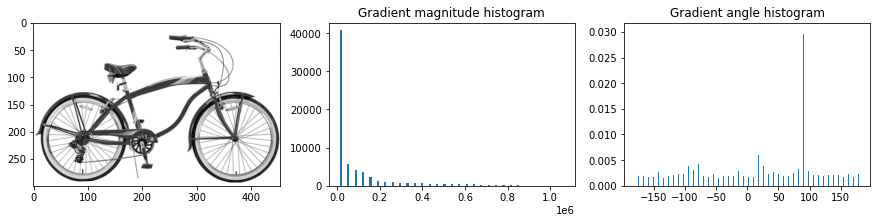

In [392]:
#Test code
h_grad1, c_grad1, h_angle1, c_angle1 = compute_histograms(img)
h_angle1 = h_angle1 / np.sum(h_angle1)
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.title('Gradient magnitude histogram')
plt.bar(c_grad1, h_grad1, width=10000)
plt.subplot(133)
plt.title('Gradient angle histogram')
plt.bar(c_angle1, h_angle1, width=0.1);

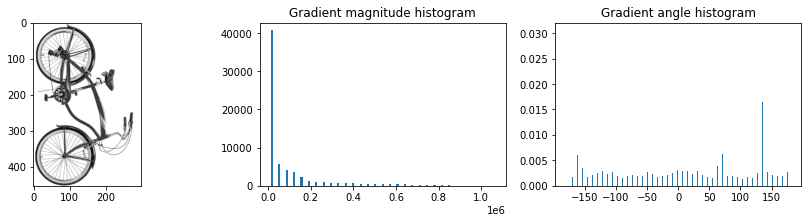

In [393]:
#Test code
h_grad2, c_grad2, h_angle2, c_angle2 = compute_histograms(img_rot)
h_angle2 = h_angle2 / np.sum(h_angle2)
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.imshow(img_rot, cmap='gray')
plt.subplot(132)
plt.title('Gradient magnitude histogram')
plt.bar(c_grad2, h_grad2, width=10000)
plt.subplot(133)
plt.title('Gradient angle histogram')
plt.bar(c_angle2, h_angle2, width=0.1);

In [394]:
def compare_histograms(h1, h2):
    return np.allclose(h1 - h2, 0);

In [395]:
print(f'Gradient magnitude historams are the same: {compare_histograms(h_grad1, h_grad2)}')
print(f'Gradient magnitude historams are the same: {compare_histograms(h_angle1, h_angle2)}')

Gradient magnitude historams are the same: True
Gradient magnitude historams are the same: False
